In [1]:
import pandas as pd
import json

pd.set_option('display.max_columns', None)

from scrapernhl.qmjhl.scrapers.schedule import getSchedule, getSeasons
from scrapernhl.qmjhl.scrapers.teams import getTeams
from scrapernhl.qmjhl.scrapers.games import getAPIEvents
from scrapernhl.qmjhl.scrapers.official_report import scrape_official_report


In [2]:
seasons = getSeasons()

seasons.head()

,season_id,label,year,season_type
0,211,2025-26 | Regular Season,2026,regular
1,210,Pre-Season 2025,2026,preseason
2,209,2025 | Playoffs,2025,postseason
3,208,2024-25 | Regular Season,2025,regular
4,207,Pre-Season 2024,2025,preseason


In [3]:
gat_schedule = getSchedule(season_id=209, team_id=11)

gat_schedule.head()

,ID,SeasonID,league_id,game_number,game_letter,game_type,quick_score,Date,FloCoreEventId,FloLiveEventId,GameDate,GameDateISO8601,ScheduledTime,ScheduledFormattedTime,Timezone,TicketUrl,HomeID,HomeCode,HomeCity,HomeNickname,HomeLongName,HomeDivision,HomeGoals,HomeAudioUrl,HomeVideoUrl,HomeWebcastUrl,VisitorID,VisitorCode,VisitorCity,VisitorNickname,VisitorLongName,VisitingDivision,VisitorGoals,VisitorAudioUrl,VisitorVideoUrl,VisitorWebcastUrl,Period,PeriodNameShort,PeriodNameLong,GameClock,GameSummaryUrl,HomeWins,HomeRegulationLosses,HomeOTLosses,HomeShootoutLosses,VisitorWins,VisitorRegulationLosses,VisitorOTLosses,VisitorShootoutLosses,GameStatus,Intermission,GameStatusString,GameStatusStringLong,Ord,venue_name,venue_location,league_name,league_code,TimezoneShort,HomeLogo,VisitorLogo,FloHockeyUrl,combined_client_code
309,31793,209,1,836,F,,0,2025-03-28,,,"Fri, Mar 28",2025-03-28T19:00:00-04:00,19:00:00,7:00 pm,Canada/Eastern,https://huskies.ticketacces.net/fr/organisatio...,11,Rou,Rouyn-Noranda,Huskies,"Rouyn-Noranda, Huskies",West Division,5,http://www.chunfm.ca,,https://watch.chl.ca,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",West Division,1,https://billetterie.centreslushpuppie.com/Onli...,,https://watch.chl.ca,3,3,3rd,00:00,31793,8,3,2,0,1,4,0,0,4,0,Final,Final,2025-03-28 19:00:00.000000,Aréna Glencore,Rouyn-Noranda (QC),Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/50x5...,https://assets.leaguestat.com/lhjmq/logos/50x5...,,None
310,31794,209,1,837,F,,0,2025-03-29,,,"Sat, Mar 29",2025-03-29T16:00:00-04:00,16:00:00,4:00 pm,Canada/Eastern,https://huskies.ticketacces.net/fr/organisatio...,11,Rou,Rouyn-Noranda,Huskies,"Rouyn-Noranda, Huskies",West Division,2,http://www.chunfm.ca,,https://watch.chl.ca,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",West Division,1,https://billetterie.centreslushpuppie.com/Onli...,,https://watch.chl.ca,3,3,3rd,00:00,31794,8,3,2,0,1,4,0,0,4,0,Final,Final,2025-03-29 16:00:00.000000,Aréna Glencore,Rouyn-Noranda (QC),Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/50x5...,https://assets.leaguestat.com/lhjmq/logos/50x5...,,None
311,31795,209,1,838,F,,0,2025-04-01,,,"Tue, Apr 1",2025-04-01T19:00:00-04:00,19:00:00,7:00 pm,Canada/Eastern,https://billetterie.centreslushpuppie.com/Onli...,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",West Division,1,https://billetterie.centreslushpuppie.com/Onli...,,https://watch.chl.ca,11,Rou,Rouyn-Noranda,Huskies,"Rouyn-Noranda, Huskies",West Division,2,http://www.chunfm.ca,,https://watch.chl.ca,3,3,3rd,00:00,31795,1,4,0,0,8,3,2,0,4,0,Final,Final,2025-04-01 19:00:00.000000,Centre Slush Puppie,Gatineau (QC),Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/50x5...,https://assets.leaguestat.com/lhjmq/logos/50x5...,,None
312,31796,209,1,839,F,,0,2025-04-02,,,"Wed, Apr 2",2025-04-02T19:00:00-04:00,19:00:00,7:00 pm,Canada/Eastern,https://billetterie.centreslushpuppie.com/Onli...,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",West Division,3,https://billetterie.centreslushpuppie.com/Onli...,,https://watch.chl.ca,11,Rou,Rouyn-Noranda,Huskies,"Rouyn-Noranda, Huskies",West Division,2,http://www.chunfm.ca,,https://watch.chl.ca,4,OT1,1st OT,01:54,31796,1,4,0,0,8,3,2,0,4,0,Final,Final 1st OT,2025-04-02 19:00:00.000000,Centre Slush Puppie,Gatineau (QC),Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/50x5...,https://assets.leaguestat.com/lhjmq/logos/50x5...,,None
313,31797,209,1,840,F,,0,2025-04-04,,,"Fri, Apr 4",2025-04-04T19:00:00-04:00,19:00:00,7:00 pm,Canada/Eastern,https://huskies.ticketacces.net/fr/organisatio...,11,Rou,Rouyn-Noranda,Huskies,"Rouyn-Noranda, Huskies",West Division,8,http://www.chunfm.ca,,https://watch.chl.ca,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",West Division,4,https://billetterie.centreslushpuppie.com/Onli...,,https://watch.chl.ca,3,3,3rd,00:00,31797,8,3,2,0,1,

In [4]:
getTeams(season_id=209).head()

,season_id,team_id,team_label,city,nickname,url
0,209,2,"Acadie-Bathurst, Titan",Acadie-Bathurst,Titan,https://chl.ca/lhjmq/en/schedule/2/209/
1,209,16,"Baie-Comeau, Drakkar",Baie-Comeau,Drakkar,https://chl.ca/lhjmq/en/schedule/16/209/
2,209,19,"Blainville-Boisbriand, Armada",Blainville-Boisbriand,Armada,https://chl.ca/lhjmq/en/schedule/19/209/
3,209,3,"Cape Breton, Eagles",Cape Breton,Eagles,https://chl.ca/lhjmq/en/schedule/3/209/
4,209,7,"Charlottetown, Islanders",Charlottetown,Islanders,https://chl.ca/lhjmq/en/schedule/7/209/


In [5]:
pd.json_normalize(getAPIEvents(game_id=31796))

,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,player_id,goalie_id,home,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,assist1_player_id,assist2_player_id,goal_type_name,goal_type,goal_player_id,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name
0,goalie_change,22015,None,1,0:00,Gat,0,12,22015,35,12,Gat,Iain,Wintle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goalie_change,20199,None,1,0:00,Rou,0,11,20199,31,11,Rou,Samuel,Meloche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,faceoff,NaN,NaN,NaN,00:00:00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:00,21290,22168,1,5,300.0,150.0,12,21290,8,12,Gat,Maxim,Dubé,22168,14,11,Rou,Lucas,Veilleux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,shot,NaN,NaN,1,00:07,NaN,7,12,NaN,Na

In [6]:
# game_id = 31918

# events = scrape_game(game_id=game_id)

# # Convert to DataFrame for easier viewing
# df = pd.DataFrame(events)
# df.head()


In [7]:
game_id = 31918
report = scrape_official_report(game_id=game_id)

report.keys()



dict_keys(['game_info', 'visiting_team', 'home_team', 'goals', 'scoring_by_period', 'power_play', 'penalty_summary', 'point_summary', 'goaltenders', 'stars_and_times', 'referees'])

In [8]:
pd.json_normalize(report['goals'])

,period,time,team,scorer_number,assist1_number,assist2_number,on_ice_plus,on_ice_minus
0,1st,7:07,visiting,22,91,71,"[3, 6, 22, 71, 91]","[11, 23, 55, 91, 92]"
1,1st,11:58,visiting,9,72,86,"[6, 9, 26, 72, 86]","[6, 10, 21, 34, 77]"
2,2nd,7:50,visiting,22,71,91,"[5, 22, 26, 71, 91]","[6, 15, 17, 21, 92]"
3,3rd,16:40,visiting,72,None,None,"[5, 12, 58, 72, 86]","[6, 11, 23, 34, 77]"
4,1st,6:24,home,21,10,34,"[6, 10, 21, 34, 77]","[12, 13, 19, 23, 27]"
5,3rd,6:36,home,44,7,47,"[5, 7, 44, 47]","[13, 19, 22, 58, 72]"
6,3rd,18:01,home,44,47,34,"[5, 7, 21, 34, 44, 47]","[12, 13, 58, 72, 86]"


In [9]:
# Re-import to get the fixed version
from importlib import reload
import scrapernhl.qmjhl.scrapers.official_report
reload(scrapernhl.qmjhl.scrapers.official_report)
from scrapernhl.qmjhl.scrapers.official_report import scrape_official_report

# Re-fetch the data
report = scrape_official_report(game_id=game_id)
print(f"Total goals: {len(report['goals'])}")
pd.json_normalize(report['goals'])

Total goals: 7


,period,time,team,scorer_number,assist1_number,assist2_number,on_ice_plus,on_ice_minus
0,1st,7:07,visiting,22,91,71,"[3, 6, 22, 71, 91]","[11, 23, 55, 91, 92]"
1,1st,11:58,visiting,9,72,86,"[6, 9, 26, 72, 86]","[6, 10, 21, 34, 77]"
2,2nd,7:50,visiting,22,71,91,"[5, 22, 26, 71, 91]","[6, 15, 17, 21, 92]"
3,3rd,16:40,visiting,72,None,None,"[5, 12, 58, 72, 86]","[6, 11, 23, 34, 77]"
4,1st,6:24,home,21,10,34,"[6, 10, 21, 34, 77]","[12, 13, 19, 23, 27]"
5,3rd,6:36,home,44,7,47,"[5, 7, 44, 47]","[13, 19, 22, 58, 72]"
6,3rd,18:01,home,44,47,34,"[5, 7, 21, 34, 44, 47]","[12, 13, 58, 72, 86]"


## Game Centre API Data

Testing the game centre scraper that fetches data from the CHL/QMJHL website API.
This includes rosters with player IDs, full game stats, and goals with on-ice players.

In [10]:
from scrapernhl.qmjhl.scrapers.gamecentre import scrape_gamecentre, get_rosters, get_player_ids

# Test with the same game
gc_data = scrape_gamecentre(game_id=32236)

print(f"Game: {gc_data['visiting_team']['info']['name']} @ {gc_data['home_team']['info']['name']}")
print(f"Date: {gc_data['game_info']['date']}")
print(f"Venue: {gc_data['game_info']['venue']}")
print(f"\nHome roster: {len(gc_data['home_team']['roster']['players'])} skaters, {len(gc_data['home_team']['roster']['goalies'])} goalies")
print(f"Visiting roster: {len(gc_data['visiting_team']['roster']['players'])} skaters, {len(gc_data['visiting_team']['roster']['goalies'])} goalies")
print(f"\nGoals: {len(gc_data['goals'])}")
print(f"Penalties: {len(gc_data['penalties'])}")

Game: Gatineau, Olympiques @ Moncton, Wildcats
Date: Wednesday, January  7, 2026
Venue: Avenir Centre

Home roster: 18 skaters, 2 goalies
Visiting roster: 18 skaters, 2 goalies

Goals: 7
Penalties: 7


In [11]:
# Check rosters with player IDs
rosters = get_rosters(game_id=32236)

print("=== HOME TEAM ROSTER ===")
print(f"Team: {rosters['home']['team_info']['name']}")
print(f"\nPlayers ({len(rosters['home']['players'])}):")
for player in rosters['home']['players'][:5]:  # First 5
    print(f"  #{player['jersey_number']} {player['first_name']} {player['last_name']} ({player['position']}) - ID: {player['player_id']}")
print(f"  ... and {len(rosters['home']['players']) - 5} more")

print(f"\nGoalies ({len(rosters['home']['goalies'])}):")
for goalie in rosters['home']['goalies']:
    print(f"  #{goalie['jersey_number']} {goalie['first_name']} {goalie['last_name']} - ID: {goalie['player_id']}")

=== HOME TEAM ROSTER ===
Team: Moncton, Wildcats

Players (18):
  #2 Max Vilen (D) - ID: 23761
  #9 Gabe Smith (C) - ID: 19539
  #10 Alex Mercier (LW) - ID: 19090
  #14 Teddy Mutryn (C) - ID: 20414
  #15 Matthew Virgilio (D) - ID: 23995
  ... and 13 more

Goalies (2):
  #25 Rudy Guimond - ID: 22092
  #35 Jacoby Weiner - ID: 21388


In [12]:
# Get all player IDs
home_player_ids = get_player_ids(game_id=32236, team='home')
visiting_player_ids = get_player_ids(game_id=32236, team='visiting')
all_player_ids = get_player_ids(game_id=32236, team='both')

print(f"Home team player IDs: {home_player_ids[:5]}... ({len(home_player_ids)} total)")
print(f"Visiting team player IDs: {visiting_player_ids[:5]}... ({len(visiting_player_ids)} total)")
print(f"All player IDs: {len(all_player_ids)} total")

Home team player IDs: ['23761', '19539', '19090', '20414', '23995']... (20 total)
Visiting team player IDs: ['23933', '21299', '19705', '20265', '23340']... (20 total)
All player IDs: 40 total


In [13]:
# Check goals with on-ice players (compare to official report)
goals_df = pd.json_normalize(gc_data['goals'])
goals_df.head()

,period,time,team_id,home_goal,on_ice_plus,on_ice_minus,location.x,location.y,goal_type.power_play,goal_type.short_handed,goal_type.empty_net,goal_type.penalty_shot,goal_type.game_winning,scorer.player_id,scorer.jersey_number,scorer.team_id,scorer.team_code,scorer.first_name,scorer.last_name,assist1.player_id,assist1.jersey_number,assist1.team_id,assist1.team_code,assist1.first_name,assist1.last_name,assist2.player_id,assist2.jersey_number,assist2.team_id,assist2.team_code,assist2.first_name,assist2.last_name
0,1,0:24,1,True,"[{'player_id': '20414', 'jersey_number': '14',...","[{'player_id': '19705', 'jersey_number': '6', ...",100,130,False,False,False,False,True,20414,14,1,Mon,Teddy,Mutryn,23424,71,1,Mon,Grayden,Robertson-Palmer,19528,24,1,Mon,Adam,Fortier-Gendron
1,1,13:40,1,True,"[{'player_id': '19539', 'jersey_number': '9', ...","[{'player_id': '21299', 'jersey_number': '5', ...",228,244,True,False,False,False,False,23895,16,1,Mon,Tommy,Bleyl,20414,14,1,Mon,Teddy,Mutryn,19539,9,1,Mon,Gabe,Smith
2,1,16:22,1,True,"[{'player_id': '19539', 'jersey_number': '9', ...","[{'player_id': '23933', 'jersey_number': '3', ...",74,132,True,False,False,False,False,19539,9,1,Mon,Gabe,Smith,20164,18,1,Mon,Caleb,Desnoyers,20447,86,1,Mon,Niko,Tournas
3,1,18:19,1,True,"[{'player_id': '23761', 'jersey_number': '2', ...","[{'player_id': '21299', 'jersey_number': '5', ...",153,180,False,False,False,False,False,23749,27,1,Mon,Kuzma,Voronin,19619,92,1,Mon,Gavin,Cornforth,19528,24,1,Mon,Adam,Fortier-Gendron
4,3,7:32,1,True,"[{'player_id': '19539', 'jersey_number': '9', ...","[{'player_id': '21299', 'jersey_number': '5', ...",89,230,False,False,False,False,False,19090,10,1,Mon,Alex,Mercier,19528,24,1,Mon,Adam,Fortier-Gendron,23895,16,1,Mon,Tommy,Bleyl


In [14]:
scrape_gamecentre(game_id=32236).keys()

dict_keys(['game_info', 'home_team', 'visiting_team', 'goals', 'penalties', 'stats'])

In [15]:
pbp_df = pd.json_normalize(getAPIEvents(game_id=32236))

pbp_df.head()


,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,home,player_id,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,assist1_player_id,assist2_player_id,goal_type_name,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,goal_type,goal_player_id,location_set,power_play,empty_net,penalty_shot,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,player_served,offence,pp,time_off_formatted,bench,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name
0,goalie_change,23743,None,1,0:00,Gat,0,12,23743,90,12,Gat,Danai,Shaiikov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goalie_change,21388,None,1,0:00,Mon,0,1,21388,35,1,Mon,Jacoby,Weiner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,faceoff,NaN,NaN,NaN,00:00:00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:00,20414,22097,1,5,300.0,150.0,1,20414,14,1,Mon,Teddy,Mutryn,22097,72,12,Gat,Nicholas,Petrut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hit,NaN,NaN,NaN,00:00:03,NaN,3,12,

In [16]:
pd.pbp_df[pbp_df["plus"].notnull()]["plus"]

AttributeError: module 'pandas' has no attribute 'pbp_df'

In [ ]:
pbp_df.explode("plus")

,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,home,player_id,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,assist1_player_id,assist2_player_id,goal_type_name,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,goal_type,goal_player_id,location_set,power_play,empty_net,penalty_shot,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,player_served,offence,pp,time_off_formatted,bench,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name
0,goalie_change,23743,None,1,0:00,Gat,0,12,23743,90,12,Gat,Danai,Shaiikov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goalie_change,21388,None,1,0:00,Mon,0,1,21388,35,1,Mon,Jacoby,Weiner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,faceoff,NaN,NaN,NaN,00:00:00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:00,20414,22097,1,5,300.0,150.0,1,20414,14,1,Mon,Teddy,Mutryn,22097,72,12,Gat,Nicholas,Petrut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hit,NaN,NaN,NaN,00:00:03,NaN,3,12,

In [ ]:
pbp_df.to_csv("qmjhl_pbp_32236.csv", index=False)

In [ ]:
import pandas as pd, numpy as np, ast, re

path = "qmjhl_pbp_32236.csv"
df = pd.read_csv(path)

def parse_clock_to_seconds(clock):
    if pd.isna(clock):
        return np.nan
    s = str(clock).strip()
    m = re.fullmatch(r"(\d+):(\d{2})", s)
    if m:
        return int(m.group(1))*60 + int(m.group(2))
    m = re.fullmatch(r"(\d+):(\d{2}):(\d{2})", s)
    if m:
        return int(m.group(2))*60 + int(m.group(3))
    return np.nan

def safe_liteval(x):
    if pd.isna(x):
        return None
    if isinstance(x, (list, dict)):
        return x
    s = str(x).strip()
    if not s or s.lower() in {"none", "nan"}:
        return None
    try:
        return ast.literal_eval(s)
    except Exception:
        return None

def list_player_ids(lst):
    if not isinstance(lst, list):
        return []
    out = []
    for d in lst:
        if isinstance(d, dict) and "player_id" in d and d["player_id"] is not None:
            out.append(str(d["player_id"]))
    return out

events = df.copy()
events = events.rename(columns={"id": "event_id"})

# game_id
events["game_id"] = events.get("game_id", np.nan)
if events["game_id"].isna().all():
    m = re.search(r"(\d+)", path)
    if m:
        events["game_id"] = int(m.group(1))

# event type
events["event_type"] = events["event"].astype(str).str.lower()
events.drop(columns=["event"], inplace=True)

# time
events["period_id"] = pd.to_numeric(events["period_id"], errors="coerce")
events["seconds_elapsed"] = pd.to_numeric(events["time"].apply(parse_clock_to_seconds), errors="coerce")

# game seconds (20-min periods; OT bucketed after 60)
events["game_seconds"] = np.where(
    events["period_id"].isin([1,2,3]) & events["seconds_elapsed"].notna(),
    (events["period_id"]-1)*20*60 + events["seconds_elapsed"],
    np.where(
        events["period_id"].notna() & events["seconds_elapsed"].notna(),
        3*20*60 + events["seconds_elapsed"],
        np.nan
    )
)

# team
events["team_code"] = events["team_code"].fillna(events.get("player.team_code"))
events["team_id"]   = events["team_id"].fillna(events.get("player.team_id"))

# primary player
events["player_id"]     = events.get("player.player_id")
events["player_jersey"] = events.get("player.jersey_number")
events["player_name"]   = (
    (events.get("player.first_name").fillna("") + " " + events.get("player.last_name").fillna(""))
    .str.strip()
)
events.loc[events["player_name"].eq(""), "player_name"] = np.nan

# assists (goals)
events["assist1_id"] = events.get("assist1_player.player_id").fillna(events.get("assist1_player_id"))
events["assist2_id"] = events.get("assist2_player.player_id").fillna(events.get("assist2_player_id"))

events["assist1_name"] = (
    (events.get("assist1_player.first_name").fillna("") + " " + events.get("assist1_player.last_name").fillna(""))
    .str.strip()
)
events.loc[events["assist1_name"].eq(""), "assist1_name"] = np.nan

events["assist2_name"] = (
    (events.get("assist2_player.first_name").fillna("") + " " + events.get("assist2_player.last_name").fillna(""))
    .str.strip()
)
events.loc[events["assist2_name"].eq(""), "assist2_name"] = np.nan

# goalie against (shots/goals)
events["goalie_against_id"] = events.get("goalie.player_id").fillna(events.get("goalie_id"))
events["goalie_against_name"] = (
    (events.get("goalie.first_name").fillna("") + " " + events.get("goalie.last_name").fillna(""))
    .str.strip()
)
events.loc[events["goalie_against_name"].eq(""), "goalie_against_name"] = np.nan

# goalie changes
events["goalie_in_id"]  = events.get("goalie_in_id").fillna(events.get("goalie_in_info.player_id"))
events["goalie_out_id"] = events.get("goalie_out_id").fillna(events.get("goalie_out_info.player_id"))

# penalties
events["penalty_minutes"] = pd.to_numeric(events.get("minutes"), errors="coerce")
events["penalty_type"]    = events.get("infraction")

# plus/minus parse
events["plus_list"]  = events.get("plus").apply(safe_liteval)
events["minus_list"] = events.get("minus").apply(safe_liteval)
events["plus_count"]  = events["plus_list"].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
events["minus_count"] = events["minus_list"].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

# strength state (goals only, best-effort from list lengths)
def infer_strength(row):
    pl = row["plus_list"]; mi = row["minus_list"]
    if not isinstance(pl, list) or not isinstance(mi, list) or len(pl)==0 or len(mi)==0:
        return np.nan
    pl_goalie_present = len(pl) >= 4
    mi_goalie_present = len(mi) >= 4
    sk_pl = len(pl) - (1 if pl_goalie_present else 0)
    sk_mi = len(mi) - (1 if mi_goalie_present else 0)
    return f"{sk_pl}v{sk_mi}"

events["strength_state"] = np.where(
    events["event_type"].eq("goal"),
    events.apply(infer_strength, axis=1),
    np.nan
)

# empty net against (goalie-against missing from minus list)
def infer_empty_net_against(row):
    if row["event_type"] != "goal":
        return False
    ga = row.get("goalie_against_id", np.nan)
    mi = row.get("minus_list")
    if pd.isna(ga) or not isinstance(mi, list):
        return False
    ids = set(list_player_ids(mi))
    return str(ga) not in ids

events["empty_net_against"] = events.apply(infer_empty_net_against, axis=1)

# explode plus/minus for goals
goal_rows = events.loc[events["event_type"].eq("goal"), [
    "game_id","event_id","period_id","seconds_elapsed","game_seconds",
    "team_id","team_code","strength_state","empty_net_against",
    "plus_list","minus_list"
]].copy()

pm_records = []
for _, r in goal_rows.iterrows():
    for side, lst, pm in [("plus", r["plus_list"], 1), ("minus", r["minus_list"], -1)]:
        if not isinstance(lst, list):
            continue
        for p in lst:
            if not isinstance(p, dict):
                continue
            pm_records.append({
                "game_id": r["game_id"],
                "event_id": r["event_id"],
                "side": side,
                "pm": pm,
                "player_id": pd.to_numeric(p.get("player_id"), errors="coerce"),
                "jersey_number": pd.to_numeric(p.get("jersey_number"), errors="coerce"),
                "team_id": pd.to_numeric(p.get("team_id"), errors="coerce"),
                "team_code": p.get("team_code"),
                "first_name": p.get("first_name"),
                "last_name": p.get("last_name"),
                "player_name": (str(p.get("first_name","")).strip() + " " + str(p.get("last_name","")).strip()).strip() or np.nan,
                "period_id": r["period_id"],
                "seconds_elapsed": r["seconds_elapsed"],
                "game_seconds": r["game_seconds"],
                "strength_state": r["strength_state"],
                "empty_net_against": r["empty_net_against"],
            })

pm_long = pd.DataFrame(pm_records)
pm_long["on_ice_team_role"] = np.where(pm_long["pm"].eq(1), "scoring_team", "opposition")

# goal involvement table
involve = goal_rows.rename(columns={"player_id":"scorer_id"}).copy()
involve["scorer_id"] = pd.to_numeric(events.loc[events["event_type"].eq("goal"), "player_id"], errors="coerce").values

pm_long

,game_id,event_id,side,pm,player_id,jersey_number,team_id,team_code,first_name,last_name,player_name,period_id,seconds_elapsed,game_seconds,strength_state,empty_net_against,on_ice_team_role
0,32236,246964.0,plus,1,20414,14,1,Mon,Teddy,Mutryn,Teddy Mutryn,1.0,24.0,24.0,4v4,False,scoring_team
1,32236,246964.0,plus,1,23895,16,1,Mon,Tommy,Bleyl,Tommy Bleyl,1.0,24.0,24.0,4v4,False,scoring_team
2,32236,246964.0,plus,1,19127,20,1,Mon,Preston,Lounsbury,Preston Lounsbury,1.0,24.0,24.0,4v4,False,scoring_team
3,32236,246964.0,plus,1,19528,24,1,Mon,Adam,Fortier-Gendron,Adam Fortier-Gendron,1.0,24.0,24.0,4v4,False,scoring_team
4,32236,246964.0,plus,1,23424,71,1,Mon,Grayden,Robertson-Palmer,Grayden Robertson-Palmer,1.0,24.0,24.0,4v4,False,scoring_team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,32236,246974.0,minus,-1,20265,7,12,Gat,Dylan,Allie,Dylan Allie,3.0,905.0,3305.0,4v4,False,opposition
63,32236,246974.0,minus,-1,23340,9,12,Gat,Louis-Étienne,Halley,Louis-Étienne Halley,3.0,905.0,3305.0,4v4,False,opposition
64,32236,246974.0,minus,-1,21379,11,12,Gat,Zachary,Roussy,Zachary Roussy,3.0,905.0,3305.0,4v4,False,opposition
65,32236,246974.0,minus,-1,20589,19,12,Gat,Yan,Gaudreau,Yan Gaudreau,3.0,905.0,3305.0,4v4,False,opposition


In [ ]:
pbp_df.event.unique()

array(['goalie_change', 'faceoff', 'hit', 'shot', 'goal', 'penalty'],
      dtype=object)

In [ ]:
pbp_df.query("event == 'faceoff'")

,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,home,player_id,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,assist1_player_id,assist2_player_id,goal_type_name,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,goal_type,goal_player_id,location_set,power_play,empty_net,penalty_shot,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,player_served,offence,pp,time_off_formatted,bench,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name
2,faceoff,NaN,NaN,NaN,00:00:00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:00,20414,22097,1,5,300.0,150.0,1,20414,14,1,Mon,Teddy,Mutryn,22097,72,12,Gat,Nicholas,Petrut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,faceoff,NaN,NaN,NaN,00:00:24,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:24,20164,21292,1,5,300.0,150.0,1,20164,18,1,Mon,Caleb,Desnoyers,21292,91,12,Gat,Simon-Xavier,Cyr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,faceoff,NaN,NaN,NaN,00:00:50,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:50,20414,21292,1,8,457.0,49.0,1,20414,14,1,Mon,Teddy,Mutryn,21292,91,12,Gat,Simon-Xavier,Cyr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,faceoff,NaN,NaN,NaN,

In [ ]:
pbp_df.filter(regex=r"\.player_id|event").query("event == 'penalty'")

,event,goalie_in_info.player_id,player_home.player_id,player_visitor.player_id,hitter.player_id,player.player_id,goalie.player_id,goal_scorer.player_id,assist1_player.player_id,assist2_player.player_id,player_penalized_info.player_id,player_served_info.player_id,goalie_out_info.player_id
32,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20589,20589,NaN
40,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22262,22262,NaN
41,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19103,19103,NaN
42,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19705,19705,NaN
79,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20414,20414,NaN
86,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20414,20414,NaN
131,penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19127,19127,NaN


In [ ]:
pbp_df["player1Id"] 

,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,home,player_id,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,assist1_player_id,assist2_player_id,goal_type_name,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,goal_type,goal_player_id,location_set,power_play,empty_net,penalty_shot,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,player_served,offence,pp,time_off_formatted,bench,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name
0,goalie_change,23743,None,1,0:00,Gat,0,12,23743,90,12,Gat,Danai,Shaiikov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goalie_change,21388,None,1,0:00,Mon,0,1,21388,35,1,Mon,Jacoby,Weiner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,faceoff,NaN,NaN,NaN,00:00:00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:00,20414,22097,1,5,300.0,150.0,1,20414,14,1,Mon,Teddy,Mutryn,22097,72,12,Gat,Nicholas,Petrut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hit,NaN,NaN,NaN,00:00:03,NaN,3,12,

In [18]:
teams_df = getTeams(season_id=211)

teams_df.head()

,season_id,team_id,team_label,city,nickname,url
0,211,16,"Baie-Comeau, Drakkar",Baie-Comeau,Drakkar,https://chl.ca/lhjmq/en/schedule/16/211/
1,211,19,"Blainville-Boisbriand, Armada",Blainville-Boisbriand,Armada,https://chl.ca/lhjmq/en/schedule/19/211/
2,211,3,"Cape Breton, Eagles",Cape Breton,Eagles,https://chl.ca/lhjmq/en/schedule/3/211/
3,211,7,"Charlottetown, Islanders",Charlottetown,Islanders,https://chl.ca/lhjmq/en/schedule/7/211/
4,211,10,"Chicoutimi, Saguenéens",Chicoutimi,Saguenéens,https://chl.ca/lhjmq/en/schedule/10/211/


In [19]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

team_ids = teams_df['team_id'].tolist()
schedule_list = []
with ThreadPoolExecutor(max_workers=6) as executor:
    futures = {executor.submit(getSchedule, team_id): team_id for team_id in team_ids}
    for future in tqdm(futures, total=len(futures), desc="Fetching schedules"):
        team_id = futures[future]
        try:
            team_schedule = future.result()
            schedule_list.append(team_schedule)
        except Exception as e:
            print(f"Error fetching schedule for team {team_id}: {e}")
            
schedules_df = pd.concat(schedule_list, ignore_index=True)
schedules_df.head()

Fetching schedules: 100%|██████████| 18/18 [00:01<00:00,  9.43it/s]


,ID,SeasonID,league_id,game_number,game_letter,game_type,quick_score,Date,FloCoreEventId,FloLiveEventId,GameDate,GameDateISO8601,ScheduledTime,ScheduledFormattedTime,Timezone,TicketUrl,HomeID,HomeCode,HomeCity,HomeNickname,HomeLongName,HomeDivision,HomeGoals,HomeAudioUrl,HomeVideoUrl,HomeWebcastUrl,VisitorID,VisitorCode,VisitorCity,VisitorNickname,VisitorLongName,VisitingDivision,VisitorGoals,VisitorAudioUrl,VisitorVideoUrl,VisitorWebcastUrl,Period,PeriodNameShort,PeriodNameLong,GameClock,GameSummaryUrl,HomeWins,HomeRegulationLosses,HomeOTLosses,HomeShootoutLosses,VisitorWins,VisitorRegulationLosses,VisitorOTLosses,VisitorShootoutLosses,GameStatus,Intermission,GameStatusString,GameStatusStringLong,Ord,venue_name,venue_location,league_name,league_code,TimezoneShort,HomeLogo,VisitorLogo,FloHockeyUrl,combined_client_code
0,31914,211,1,6,,,0,2025-09-19,14325545,166637,"Fri, Sep 19",2025-09-19T19:00:00-04:00,19:00:00,7:00 pm,Canada/Eastern,https://oceanic.ticketacces.net/fr/organisatio...,18,Rim,Rimouski,Océanic,"Rimouski, Océanic",Eastern Conference,5,https://o987.ca/,,https://flosports.link/44ZKef5,16,BaC,Baie-Comeau,Drakkar,"Baie-Comeau, Drakkar",Eastern Conference,3,https://www.chlc.com,,https://flosports.link/44X5u5f,3,3,3rd,00:00,31914,17,19,0,1,9,23,4,2,4,0,Final,Final,2025-09-19 19:00:00.000000,Colisée Financière Sun Life,Rimouski QC,Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/18_2...,https://assets.leaguestat.com/lhjmq/logos/16.png,https://flohockey.tv/events/14325545,None
1,31919,211,1,11,,,0,2025-09-20,14325562,166645,"Sat, Sep 20",2025-09-20T16:00:00-04:00,16:00:00,4:00 pm,Canada/Eastern,https://oceanic.ticketacces.net/fr/organisatio...,18,Rim,Rimouski,Océanic,"Rimouski, Océanic",Eastern Conference,3,https://o987.ca/,,https://flosports.link/44ZKef5,16,BaC,Baie-Comeau,Drakkar,"Baie-Comeau, Drakkar",Eastern Conference,2,https://www.chlc.com,,https://flosports.link/44X5u5f,3,3,3rd,00:00,31919,17,19,0,1,9,23,4,2,4,0,Final,Final,2025-09-20 16:00:00.000000,Colisée Financière Sun Life,Rimouski QC,Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/18_2...,https://assets.leaguestat.com/lhjmq/logos/16.png,https://flohockey.tv/events/14325562,None
2,31931,211,1,23,,,0,2025-09-26,14325584,166655,"Fri, Sep 26",2025-09-26T19:00:00-04:00,19:00:00,7:00 pm,Canada/Eastern,https://billetterie.centreslushpuppie.com/Onli...,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",Western Conference,5,https://www.fm1047.ca/emissions/le-hockey-des-...,,https://flosports.link/3Um69In,16,BaC,Baie-Comeau,Drakkar,"Baie-Comeau, Drakkar",Eastern Conference,1,https://www.chlc.com,,https://flosports.link/44X5u5f,3,3,3rd,00:00,31931,14,21,3,0,9,23,4,2,4,0,Final,Final,2025-09-26 19:00:00.000000,Centre Slush Puppie,Gatineau (QC),Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/50x5...,https://assets.leaguestat.com/lhjmq/logos/16.png,https://flohockey.tv/events/14325584,None
3,31935,211,1,27,,,0,2025-09-27,14325604,166663,"Sat, Sep 27",2025-09-27T16:00:00-04:00,16:00:00,4:00 pm,Canada/Eastern,https://billetterie.centreslushpuppie.com/Onli...,12,Gat,Gatineau,Olympiques,"Gatineau, Olympiques",Western Conference,2,https://www.fm1047.ca/emissions/le-hockey-des-...,,https://flosports.link/3Um69In,16,BaC,Baie-Comeau,Drakkar,"Baie-Comeau, Drakkar",Eastern Conference,1,https://www.chlc.com,,https://flosports.link/44X5u5f,4,SO,SO,00:00,31935,14,21,3,0,9,23,4,2,4,0,Final,Final SO,2025-09-27 16:00:00.000000,Centre Slush Puppie,Gatineau (QC),Ligue de hockey junior Maritimes Québec,lhjmq,EDT,https://assets.leaguestat.com/lhjmq/logos/50x5...,https://assets.leaguestat.com/lhjmq/logos/16.png,https://flohockey.tv/events/14325604,None
4,31947,211,1,39,,,0,2025-10-02,14325630,166672,"Thu, Oct 2",2025-10-02T19:00:00-03:00,19:00:00,7:00 pm,Canada/Atlantic,https://www.ticketmaster.ca/halifax-mooseheads...,5,Hal,Halifax,Mooseheads,"Halifax, Mooseheads",E

In [20]:
unique_ids = schedules_df.query("GameStatusString == 'Final'")["ID"].unique()

In [21]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from tqdm import tqdm

games_dfs = []

with ThreadPoolExecutor(max_workers=10) as executor:
    future_to_game_id = {
        executor.submit(getAPIEvents, game_id): game_id
        for game_id in unique_ids
    }

    for future in tqdm(as_completed(future_to_game_id),
                       total=len(future_to_game_id),
                       desc="Fetching game data"):
        game_id = future_to_game_id[future]
        try:
            events = future.result()                  # raw JSON/list/dict
            df = pd.json_normalize(events)
            df["game_id"] = game_id                   # keep provenance
            games_dfs.append(df)
        except Exception as e:
            print(f"Error fetching data for game {game_id}: {e}")

games_df = pd.concat(games_dfs, ignore_index=True) if games_dfs else pd.DataFrame()
games_df.head()

Fetching game data: 100%|██████████| 334/334 [00:14<00:00, 23.75it/s]


,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,home,player_id,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,assist1_player_id,assist2_player_id,goal_type_name,goal_type,goal_player_id,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,shot_order,goal,winning_goal,goalie_info.player_id,goalie_info.jersey_number,goalie_info.team_id,goalie_info.team_code,goalie_info.first_name,goalie_info.last_name,shooter_info.player_id,shooter_info.jersey_number,shooter_info.team_id,shooter_info.team_code,shooter_info.first_name,shooter_info.last_name,game_id,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name,result
0,goalie_change,23743,NaN,1,0:00,Gat,0,12,23743,90,12,Gat,Danai,Shaiikov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goalie_change,20198,NaN,1,0:00,BaC,0,16,20198,33,16,BaC,Lucas,Beckman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,faceoff,NaN,NaN,NaN,00:00:00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0:00,22097,19547,1,5,300.0,150.0,12

In [22]:
games_df.event.unique()

array(['goalie_change', 'faceoff', 'hit', 'shot', 'penalty', 'goal',
       'shootout', 'penaltyshot'], dtype=object)

In [ ]:
games_df.query("event == 'penalty'").dropna(axis=1, how='all')

,event,period_id,s,team_id,id,period,home,player_id,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,game_id
26,penalty,1,366,12,946561,1st,1,20190,20190,347,1,6:06,0,0,2.00,2:00,1,Minor,Slashing,20190,12,12,Gat,Justin,Blais,20190,12,12,Gat,Justin,Blais,31935
55,penalty,1,1176,12,946564,1st,1,19103,19103,361,1,19:36,0,0,2.00,2:00,1,Minor,Cross-checking,19103,13,12,Gat,Jérémie,Dumas-Larouche,19103,13,12,Gat,Jérémie,Dumas-Larouche,31935
90,penalty,2,821,12,946578,2nd,1,23350,23350,388,1,13:41,0,0,2.00,2:00,1,Minor,Tripping,23350,27,12,Gat,Zakary,Horvat-Edouard,23350,27,12,Gat,Zakary,Horvat-Edouard,31935
99,penalty,2,1023,16,946582,2nd,0,21649,21649,403,1,17:03,0,0,2.00,2:00,1,Minor,Roughing,21649,2,16,BaC,Maxime,Lapointe,21649,2,16,BaC,Maxime,Lapointe,31935
109,penalty,3,110,12,946596,3rd,1,23350,23350,344,1,1:50,0,0,2.00,2:00,1,Minor,Hooking,23350,27,12,Gat,Zakary,Horvat-Edouard,23350,27,12,Gat,Zakary,Horvat-Edouard,31935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58816,penalty,1,444,17,946919,1st,0,23347,23347,388,1,7:24,0,0,2.00,2:00,1,Minor,Tripping,23347,39,17,Vic,Loïk,Gariépy,23347,39,17,Vic,Loïk,Gariépy,31963
58876,penalty,2,324,15,946937,2nd,1,21890,21890,388,1,5:24,0,0,2.00,2:00,1,Minor,Tripping,21890,34,15,VdO,Adam,Cavallin,21890,34,15,VdO,Adam,Cavallin,31963
58906,penalty,2,739,17,946945,2nd,0,20267,20267,403,1,12:19,0,0,2.00,2:00,1,Minor,Roughing,20267,37,17,Vic,Arno,Delisle,20267,37,17,Vic,Arno,Delisle,31963
58916,penalty,2,915,17,946952,2nd,0,23339,23339,403,1,15:15,0,0,2.00,2:00,1,Minor,Roughing,23339,22,17,Vic,Deryk,Lemaire,23339,22,17,Vic,Deryk,Lemaire,31963


In [46]:
games_df["event"].unique()

array(['goalie_change', 'faceoff', 'hit', 'shot', 'penalty', 'goal',
       'shootout', 'penaltyshot'], dtype=object)

In [ ]:
goals = games_df.query("event == 'goal'").dropna(axis=1, how='all')[["plus","minus"]]
goals["plus"].iloc[0]

[{'player_id': '21649',
  'jersey_number': '2',
  'team_id': '16',
  'team_code': 'BaC',
  'first_name': 'Maxime',
  'last_name': 'Lapointe'},
 {'player_id': '20205',
  'jersey_number': '6',
  'team_id': '16',
  'team_code': 'BaC',
  'first_name': 'Zachary',
  'last_name': 'Hachey'},
 {'player_id': '23378',
  'jersey_number': '19',
  'team_id': '16',
  'team_code': 'BaC',
  'first_name': 'Liam',
  'last_name': 'Armit'},
 {'player_id': '23913',
  'jersey_number': '24',
  'team_id': '16',
  'team_code': 'BaC',
  'first_name': 'Thierry',
  'last_name': 'Demers'},
 {'player_id': '23731',
  'jersey_number': '25',
  'team_id': '16',
  'team_code': 'BaC',
  'first_name': 'Jacopo',
  'last_name': 'De Luca'}]

In [53]:
import pandas as pd
import numpy as np


def time_to_seconds(s: pd.Series) -> pd.Series:
    """Convert time strings 'MM:SS' or 'HH:MM:SS' to total seconds"""
    if s.empty:
        return pd.Series([], dtype=float)
    
    s_str = s.astype(str).str.strip()
    parts = s_str.str.split(":", expand=True).apply(pd.to_numeric, errors="coerce")
    
    ncol = parts.notna().sum(axis=1)
    sec = np.full(len(s), np.nan, dtype=float)
    
    # MM:SS
    mask_2 = ncol == 2
    if mask_2.any():
        sec[mask_2] = parts.loc[mask_2, 0] * 60 + parts.loc[mask_2, 1]
    
    # HH:MM:SS
    mask_3 = ncol == 3
    if mask_3.any():
        sec[mask_3] = (parts.loc[mask_3, 0] * 3600 +
                      parts.loc[mask_3, 1] * 60 +
                      parts.loc[mask_3, 2])
    
    return pd.Series(sec, index=s.index, dtype=float)


def expand_on_ice_wide(df: pd.DataFrame, col: str, prefix: str, drop_source: bool = False) -> pd.DataFrame:
    """Optimized version with vectorized operations"""
    if col not in df.columns:
        return df
    
    # Filter rows with non-empty lists
    mask = df[col].notna() & df[col].apply(lambda x: isinstance(x, list) and len(x) > 0)
    
    if not mask.any():
        if drop_source:
            return df.drop(columns=[col], errors="ignore")
        return df
    
    # Pre-allocate all columns at once to avoid fragmentation
    max_players = 6
    keymap = {
        "player_id": ("Id", "object"),
        "jersey_number": ("JerseyNumber", "object"),
        "team_id": ("TeamId", "object"),
        "team_code": ("Team", "object"),
        "first_name": ("FirstName", "object"),
        "last_name": ("LastName", "object"),
    }
    
    # Create new columns in a single DataFrame
    new_columns_data = {}
    for field, (suffix, dtype) in keymap.items():
        for i in range(1, max_players + 1):
            col_name = f"{prefix}Player{i}{suffix}"
            new_columns_data[col_name] = np.full(len(df), np.nan, dtype=object)
    
    # Add new columns all at once
    new_cols_df = pd.DataFrame(new_columns_data, index=df.index)
    df = pd.concat([df, new_cols_df], axis=1)
    
    # Fill data efficiently
    for idx in df[mask].index:
        players = df.at[idx, col]
        if not isinstance(players, list):
            continue
            
        for i, player in enumerate(players[:max_players], 1):
            if isinstance(player, dict):
                for field, (suffix, _) in keymap.items():
                    if field in player:
                        col_name = f"{prefix}Player{i}{suffix}"
                        df.at[idx, col_name] = player[field]
    
    if drop_source:
        df = df.drop(columns=[col], errors="ignore")
    
    return df


def clean_pbp_optimized(pbp: pd.DataFrame) -> pd.DataFrame:
    """Fully optimized PBP cleaning function with proper dtype handling"""
    df = pbp.copy()
    
    # Create order index once
    df["orderIdx"] = np.arange(len(df))
    
    # 1. PREPARE TARGET COLUMNS with proper dtypes ---------------------------------
    # Create all target columns at once using pd.concat to avoid fragmentation
    target_columns_data = {}
    
    # Player columns (player1-3)
    for i in range(1, 4):
        for suffix, dtype in [("Id", "object"), ("JerseyNumber", "object"), 
                             ("FirstName", "object"), ("LastName", "object"), 
                             ("Team", "object"), ("TeamId", "object")]:
            target_columns_data[f"player{i}{suffix}"] = pd.array([None] * len(df), dtype="object")
    
    # Goalie columns
    for suffix, dtype in [("Id", "object"), ("JerseyNumber", "object"),
                         ("FirstName", "object"), ("LastName", "object"),
                         ("Team", "object"), ("TeamId", "object")]:
        target_columns_data[f"goalie{suffix}"] = pd.array([None] * len(df), dtype="object")
    
    # Event columns with explicit dtypes
    target_columns_data["event_detail"] = pd.array([None] * len(df), dtype="object")
    target_columns_data["eventTeam"] = pd.array([None] * len(df), dtype="object")
    target_columns_data["eventTeamId"] = pd.array([None] * len(df), dtype="object")
    
    # Add all target columns at once
    target_df = pd.DataFrame(target_columns_data, index=df.index)
    df = pd.concat([df, target_df], axis=1)
    
    # 2. PROCESS EACH EVENT TYPE WITH PROPER DTYPE CONVERSIONS --------------------
    
    # Create event masks once
    event_masks = {}
    event_types = ["goalie_change", "faceoff", "hit", "shot", "penaltyshot", 
                   "penalty", "goal", "shootout"]
    
    for event in event_types:
        event_masks[event] = df["event"] == event
    
    # Helper function to safely assign values with dtype conversion
    def safe_assign(df, mask, dst_col, src_series, dtype="object"):
        """Safely assign values with dtype conversion"""
        if mask.any() and src_series is not None:
            # Convert to appropriate dtype
            if dtype == "object":
                df.loc[mask, dst_col] = src_series[mask].astype("object")
            elif dtype == "float":
                df.loc[mask, dst_col] = pd.to_numeric(src_series[mask], errors="coerce")
            elif dtype == "int":
                df.loc[mask, dst_col] = pd.to_numeric(src_series[mask], errors="coerce").fillna(0).astype("Int64")
    
    # GOALIE CHANGE ------------------------------------------------------------
    gc_mask = event_masks["goalie_change"]
    if gc_mask.any():
        # Goalie in
        m_in = gc_mask & df.get("goalie_in_info.player_id", pd.Series([None] * len(df))).notna()
        if m_in.any():
            df.loc[m_in, "event_detail"] = "in"  # This is fine for string dtype
            
            # Team info
            if "team_code" in df.columns:
                safe_assign(df, m_in, "eventTeam", df["team_code"])
            if "team_id" in df.columns:
                safe_assign(df, m_in, "eventTeamId", df["team_id"])
            
            # Player info
            for suffix, field in [("Id", "player_id"), ("JerseyNumber", "jersey_number"),
                                 ("FirstName", "first_name"), ("LastName", "last_name"),
                                 ("Team", "team_code"), ("TeamId", "team_id")]:
                src_col = f"goalie_in_info.{field}"
                if src_col in df.columns:
                    safe_assign(df, m_in, f"player1{suffix}", df[src_col])
        
        # Goalie out
        m_out = gc_mask & df.get("goalie_out_info.player_id", pd.Series([None] * len(df))).notna()
        if m_out.any():
            df.loc[m_out, "event_detail"] = "out"  # This is fine for string dtype
            
            # Player info
            for suffix, field in [("Id", "player_id"), ("JerseyNumber", "jersey_number"),
                                 ("FirstName", "first_name"), ("LastName", "last_name"),
                                 ("Team", "team_code"), ("TeamId", "team_id")]:
                src_col = f"goalie_out_info.{field}"
                if src_col in df.columns:
                    safe_assign(df, m_out, f"player1{suffix}", df[src_col])
    
    # FACEOFF ------------------------------------------------------------------
    fo_mask = event_masks["faceoff"]
    if fo_mask.any():
        home_win = pd.to_numeric(df.get("home_win", pd.Series([0] * len(df))), errors="coerce").fillna(0)
        
        # Home win
        m_hw = fo_mask & (home_win == 1)
        if m_hw.any():
            safe_assign(df, m_hw, "eventTeam", df["player_home.team_code"])
            safe_assign(df, m_hw, "eventTeamId", df["player_home.team_id"])
            
            # Player 1 (home winner)
            for suffix, field in [("Id", "player_id"), ("JerseyNumber", "jersey_number"),
                                 ("FirstName", "first_name"), ("LastName", "last_name"),
                                 ("Team", "team_code"), ("TeamId", "team_id")]:
                src_col = f"player_home.{field}"
                if src_col in df.columns:
                    safe_assign(df, m_hw, f"player1{suffix}", df[src_col])
            
            # Player 2 (visitor loser)
            for suffix, field in [("Id", "player_id"), ("JerseyNumber", "jersey_number"),
                                 ("FirstName", "first_name"), ("LastName", "last_name"),
                                 ("Team", "team_code"), ("TeamId", "team_id")]:
                src_col = f"player_visitor.{field}"
                if src_col in df.columns:
                    safe_assign(df, m_hw, f"player2{suffix}", df[src_col])
        
        # Visitor win
        m_hl = fo_mask & (home_win == 0)
        if m_hl.any():
            safe_assign(df, m_hl, "eventTeam", df["player_visitor.team_code"])
            safe_assign(df, m_hl, "eventTeamId", df["player_visitor.team_id"])
            
            # Player 1 (visitor winner)
            for suffix, field in [("Id", "player_id"), ("JerseyNumber", "jersey_number"),
                                 ("FirstName", "first_name"), ("LastName", "last_name"),
                                 ("Team", "team_code"), ("TeamId", "team_id")]:
                src_col = f"player_visitor.{field}"
                if src_col in df.columns:
                    safe_assign(df, m_hl, f"player1{suffix}", df[src_col])
            
            # Player 2 (home loser)
            for suffix, field in [("Id", "player_id"), ("JerseyNumber", "jersey_number"),
                                 ("FirstName", "first_name"), ("LastName", "last_name"),
                                 ("Team", "team_code"), ("TeamId", "team_id")]:
                src_col = f"player_home.{field}"
                if src_col in df.columns:
                    safe_assign(df, m_hl, f"player2{suffix}", df[src_col])
    
    # HIT ----------------------------------------------------------------------
    hit_mask = event_masks["hit"]
    if hit_mask.any():
        for suffix, field in [("eventTeam", "team_code"), ("eventTeamId", "team_id"),
                             ("player1Id", "player_id"), ("player1JerseyNumber", "jersey_number"),
                             ("player1FirstName", "first_name"), ("player1LastName", "last_name"),
                             ("player1Team", "team_code"), ("player1TeamId", "team_id")]:
            src_col = f"hitter.{field}"
            if src_col in df.columns:
                safe_assign(df, hit_mask, suffix, df[src_col])
    
    # SHOT and PENALTYSHOT -----------------------------------------------------
    shot_mask = event_masks["shot"] | event_masks["penaltyshot"]
    if shot_mask.any():
        # Shooter info
        for suffix, field in [("eventTeam", "team_code"), ("eventTeamId", "team_id"),
                             ("player1Id", "player_id"), ("player1JerseyNumber", "jersey_number"),
                             ("player1FirstName", "first_name"), ("player1LastName", "last_name"),
                             ("player1Team", "team_code"), ("player1TeamId", "team_id")]:
            src_col = f"player.{field}"
            if src_col in df.columns:
                safe_assign(df, shot_mask, suffix, df[src_col])
        
        # Goalie info
        for suffix, field in [("goalieId", "player_id"), ("goalieJerseyNumber", "jersey_number"),
                             ("goalieFirstName", "first_name"), ("goalieLastName", "last_name"),
                             ("goalieTeam", "team_code"), ("goalieTeamId", "team_id")]:
            src_col = f"goalie.{field}"
            if src_col in df.columns:
                safe_assign(df, shot_mask, suffix, df[src_col])
    
    # PENALTY ------------------------------------------------------------------
    pen_mask = event_masks["penalty"]
    if pen_mask.any():
        # Penalized player
        for suffix, field in [("eventTeam", "team_code"), ("eventTeamId", "team_id"),
                             ("player1Id", "player_id"), ("player1JerseyNumber", "jersey_number"),
                             ("player1FirstName", "first_name"), ("player1LastName", "last_name"),
                             ("player1Team", "team_code"), ("player1TeamId", "team_id")]:
            src_col = f"player_penalized_info.{field}"
            if src_col in df.columns:
                safe_assign(df, pen_mask, suffix, df[src_col])
        
        # Served player
        for suffix, field in [("player2Id", "player_id"), ("player2JerseyNumber", "jersey_number"),
                             ("player2FirstName", "first_name"), ("player2LastName", "last_name"),
                             ("player2Team", "team_code"), ("player2TeamId", "team_id")]:
            src_col = f"player_served_info.{field}"
            if src_col in df.columns:
                safe_assign(df, pen_mask, suffix, df[src_col])
        
        # Extract period from string
        if "period" in df.columns and df["period"].dtype == "object":
            # Create a new Series with proper dtype
            period_numeric = pd.to_numeric(
                df.loc[pen_mask, "period"].str.extract(r"(\d+)")[0],
                errors="coerce"
            )
            # Update with proper dtype
            df.loc[pen_mask, "period"] = period_numeric
    
    # GOAL ---------------------------------------------------------------------
    goal_mask = event_masks["goal"]
    if goal_mask.any():
        # Scorer
        for suffix, field in [("eventTeam", "team_code"), ("eventTeamId", "team_id"),
                             ("player1Id", "player_id"), ("player1JerseyNumber", "jersey_number"),
                             ("player1FirstName", "first_name"), ("player1LastName", "last_name"),
                             ("player1Team", "team_code"), ("player1TeamId", "team_id")]:
            src_col = f"goal_scorer.{field}"
            if src_col in df.columns:
                safe_assign(df, goal_mask, suffix, df[src_col])
        
        # Assist 1
        for suffix, field in [("player2Id", "player_id"), ("player2JerseyNumber", "jersey_number"),
                             ("player2FirstName", "first_name"), ("player2LastName", "last_name"),
                             ("player2Team", "team_code"), ("player2TeamId", "team_id")]:
            src_col = f"assist1_player.{field}"
            if src_col in df.columns:
                safe_assign(df, goal_mask, suffix, df[src_col])
        
        # Assist 2
        for suffix, field in [("player3Id", "player_id"), ("player3JerseyNumber", "jersey_number"),
                             ("player3FirstName", "first_name"), ("player3LastName", "last_name"),
                             ("player3Team", "team_code"), ("player3TeamId", "team_id")]:
            src_col = f"assist2_player.{field}"
            if src_col in df.columns:
                safe_assign(df, goal_mask, suffix, df[src_col])
    
    # SHOOTOUT -----------------------------------------------------------------
    so_mask = event_masks["shootout"]
    if so_mask.any():
        # Shooter
        for suffix, field in [("eventTeam", "team_code"), ("eventTeamId", "team_id"),
                             ("player1Id", "player_id"), ("player1JerseyNumber", "jersey_number"),
                             ("player1FirstName", "first_name"), ("player1LastName", "last_name")]:
            src_col = f"shooter.{field}"
            if src_col in df.columns:
                safe_assign(df, so_mask, suffix, df[src_col])
        
        # Goalie
        for suffix, field in [("goalieId", "player_id"), ("goalieJerseyNumber", "jersey_number"),
                             ("goalieFirstName", "first_name"), ("goalieLastName", "last_name"),
                             ("goalieTeam", "team_code"), ("goalieTeamId", "team_id")]:
            src_col = f"goalie.{field}"
            if src_col in df.columns:
                safe_assign(df, so_mask, suffix, df[src_col])
    
    # 3. PLUS/MINUS CALCULATIONS -----------------------------------------------
    if "plus" in df.columns:
        df["n_plus"] = df["plus"].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
    if "minus" in df.columns:
        df["n_minus"] = df["minus"].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
    
    # Ensure 'home' column is numeric
    if "home" in df.columns and df["home"].dtype != "float64":
        df["home"] = pd.to_numeric(df["home"], errors="coerce")
    
    # Calculate home/away skaters
    if "n_plus" in df.columns and "n_minus" in df.columns:
        # Use numpy select for conditional logic
        conditions = [
            df["home"] == 1,
            df["home"] == 0,
        ]
        
        home_choices = [
            df["n_plus"],
            df["n_minus"],
        ]
        
        away_choices = [
            df["n_minus"],
            df["n_plus"],
        ]
        
        # Add columns using np.select to avoid dtype issues
        home_skaters = np.select(conditions, home_choices, default=np.nan)
        away_skaters = np.select(conditions, away_choices, default=np.nan)
        
        df["homeSkaters"] = home_skaters
        df["awaySkaters"] = away_skaters
    
    # 4. EXPAND PLUS/MINUS LISTS -----------------------------------------------
    # Create new columns in batches to avoid fragmentation
    df = expand_on_ice_wide(df, "plus", "plus", drop_source=False)
    df = expand_on_ice_wide(df, "minus", "minus", drop_source=True)
    
    # 5. PERIOD HANDLING -------------------------------------------------------
    if "period_id" in df.columns:
        # Convert period_id to same dtype as period
        period_id_numeric = pd.to_numeric(df["period_id"], errors="coerce")
        df["period"] = df["period"].fillna(period_id_numeric)
        df = df.drop(columns=["period_id"], errors="ignore")
    
    # Ensure period is numeric
    if "period" in df.columns:
        df["period"] = pd.to_numeric(df["period"], errors="coerce")
    
    # Fill periods (non-shootout)
    is_shootout = event_masks["shootout"]
    if not is_shootout.all():
        # Create a copy of the period column for transformation
        period_filled = df.loc[~is_shootout].groupby("game_id")["period"].transform(
            lambda x: x.ffill().bfill().fillna(5)
        )
        df.loc[~is_shootout, "period"] = period_filled
    
    # 6. TIME HANDLING ---------------------------------------------------------
    # Create unified time column
    time_sources = ["time_formatted", "time_off_formatted", "time"]
    existing_time_sources = [col for col in time_sources if col in df.columns]
    
    if existing_time_sources:
        # Start with first source
        time_data = df[existing_time_sources[0]].astype("object")
        
        # Fill with other sources
        for col in existing_time_sources[1:]:
            mask = time_data.isna()
            time_data[mask] = df.loc[mask, col]
        
        df["time"] = time_data
    
    # Convert time to seconds
    df["_t_sec"] = time_to_seconds(df["time"])
    
    # 7. ELAPSED TIME ----------------------------------------------------------
    if "s" in df.columns and "period" in df.columns:
        # Ensure 's' is numeric
        s_numeric = pd.to_numeric(df["s"], errors="coerce")
        period_numeric = pd.to_numeric(df["period"], errors="coerce")
        
        # Calculate elapsed time
        elapsed_time = s_numeric + (period_numeric - 1) * 20 * 60
        df["elapsedTime"] = elapsed_time
    
    # 8. SCORE CALCULATION - Add columns at once to avoid fragmentation --------
    goal_mask = event_masks["goal"]
    if goal_mask.any():
        # Create temporary DataFrame with new columns
        score_cols = pd.DataFrame({
            "_home_goal": (goal_mask & (df["home"] == 1)).astype("int64"),
            "_away_goal": (goal_mask & (df["home"] == 0)).astype("int64"),
        }, index=df.index)
        
        # Add to main DataFrame
        df = pd.concat([df, score_cols], axis=1)
        
        # Calculate cumulative scores
        score_home = df.groupby("game_id")["_home_goal"].cumsum()
        score_away = df.groupby("game_id")["_away_goal"].cumsum()
        
        # Add scores at once
        df = pd.concat([df, 
                       pd.DataFrame({"score_home": score_home, "score_away": score_away}, index=df.index)], 
                      axis=1)
        
        # Drop temporary columns
        df = df.drop(columns=["_home_goal", "_away_goal"])
    
    # 9. SORTING ---------------------------------------------------------------
    # Event ranking for stable sort - add as single column
    event_rank = {
        "goalie_change": 10, "faceoff": 20, "hit": 30, "penalty": 40,
        "penaltyshot": 50, "shot": 60, "goal": 70, "shootout": 80,
    }
    
    event_rank_series = df["event"].map(event_rank).fillna(999).astype("int64")
    df = pd.concat([df, pd.DataFrame({"_event_rank": event_rank_series}, index=df.index)], axis=1)
    
    # Final sort
    sort_cols = ["game_id", "_t_sec", "_event_rank", "orderIdx"]
    df = df.sort_values(sort_cols, kind="stable")
    
    # 10. CLEANUP - Remove in batches to avoid fragmentation -------------------
    # Batch 1: Temporary columns
    temp_cols = ["orderIdx", "_t_sec", "_event_rank"]
    if "n_plus" in df.columns:
        temp_cols.extend(["n_plus", "n_minus"])
    
    df = df.drop(columns=[col for col in temp_cols if col in df.columns], errors="ignore")
    
    # Batch 2: Source pattern columns
    source_patterns = [
        "first_name", "last_name", "team_code", "team_id", 
        "player_id", "jersey_number", "home_win"
    ]
    
    pattern_cols = []
    for pattern in source_patterns:
        pattern_cols.extend([col for col in df.columns if pattern in str(col)])
    
    # Batch 3: Specific columns
    specific_cols = [
        "player_home", "player_visitor", "goalie_in_id", "goalie_out_id",
        "hitter", "player", "goalie", "player_penalized_info", "player_served_info",
        "goal_scorer", "assist1_player", "assist2_player", "shooter"
    ]
    
    # Combine and remove duplicates
    all_cols_to_drop = list(dict.fromkeys(pattern_cols + specific_cols))
    
    # Drop in batches
    batch_size = 50
    for i in range(0, len(all_cols_to_drop), batch_size):
        batch = all_cols_to_drop[i:i + batch_size]
        cols_to_drop_now = [col for col in batch if col in df.columns]
        if cols_to_drop_now:
            df = df.drop(columns=cols_to_drop_now, errors="ignore")
    
    # Reset index at the end
    return df.reset_index(drop=True)


# Use it like this:
result = clean_pbp_optimized(pbp=games_df)
result = result.dropna(axis=1, how='all')

result.head()

,event,time,s,id,period,time_formatted,location_id,x_location,y_location,home,hit_type,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,goal_type_name,goal_type,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,shot_order,goal,winning_goal,game_id,result,player1Id,player1JerseyNumber,player1FirstName,player1LastName,player1Team,player1TeamId,player2Id,player2JerseyNumber,player2FirstName,player2LastName,player2Team,player2TeamId,player3Id,player3JerseyNumber,player3FirstName,player3LastName,player3Team,player3TeamId,goalieId,goalieJerseyNumber,goalieFirstName,goalieLastName,goalieTeam,goalieTeamId,event_detail,eventTeam,eventTeamId,homeSkaters,awaySkaters,plusPlayer1Id,plusPlayer2Id,plusPlayer3Id,plusPlayer4Id,plusPlayer5Id,plusPlayer6Id,plusPlayer1JerseyNumber,plusPlayer2JerseyNumber,plusPlayer3JerseyNumber,plusPlayer4JerseyNumber,plusPlayer5JerseyNumber,plusPlayer6JerseyNumber,plusPlayer1TeamId,plusPlayer2TeamId,plusPlayer3TeamId,plusPlayer4TeamId,plusPlayer5TeamId,plusPlayer6TeamId,plusPlayer1Team,plusPlayer2Team,plusPlayer3Team,plusPlayer4Team,plusPlayer5Team,plusPlayer6Team,plusPlayer1FirstName,plusPlayer2FirstName,plusPlayer3FirstName,plusPlayer4FirstName,plusPlayer5FirstName,plusPlayer6FirstName,plusPlayer1LastName,plusPlayer2LastName,plusPlayer3LastName,plusPlayer4LastName,plusPlayer5LastName,plusPlayer6LastName,minusPlayer1Id,minusPlayer2Id,minusPlayer3Id,minusPlayer4Id,minusPlayer5Id,minusPlayer6Id,minusPlayer1JerseyNumber,minusPlayer2JerseyNumber,minusPlayer3JerseyNumber,minusPlayer4JerseyNumber,minusPlayer5JerseyNumber,minusPlayer6JerseyNumber,minusPlayer1TeamId,minusPlayer2TeamId,minusPlayer3TeamId,minusPlayer4TeamId,minusPlayer5TeamId,minusPlayer6TeamId,minusPlayer1Team,minusPlayer2Team,minusPlayer3Team,minusPlayer4Team,minusPlayer5Team,minusPlayer6Team,minusPlayer1FirstName,minusPlayer2FirstName,minusPlayer3FirstName,minusPlayer4FirstName,minusPlayer5FirstName,minusPlayer6FirstName,minusPlayer1LastName,minusPlayer2LastName,minusPlayer3LastName,minusPlayer4LastName,minusPlayer5LastName,minusPlayer6LastName,elapsedTime,score_home,score_away
0,goalie_change,0:00,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31909,NaN,21388,35,Jacoby,Weiner,Mon,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,in,Mon,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,goalie_change,0:00,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31909,NaN,21605,31,Mikus,Vecvanags,NFL,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,in,NFL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
2,faceoff,0:00,0,1,1.0,0:00,5,300.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31909,NaN,20184,18,Louis-François,Bélanger,NFL,2,19127,20,Preston,Lounsbury,Mon,1,None,None,None,None,None,None,None,None,None,None,None,None,None,NFL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [54]:
result.sample(20)

,event,time,s,id,period,time_formatted,location_id,x_location,y_location,home,hit_type,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,goal_type_name,goal_type,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,shot_order,goal,winning_goal,game_id,result,player1Id,player1JerseyNumber,player1FirstName,player1LastName,player1Team,player1TeamId,player2Id,player2JerseyNumber,player2FirstName,player2LastName,player2Team,player2TeamId,player3Id,player3JerseyNumber,player3FirstName,player3LastName,player3Team,player3TeamId,goalieId,goalieJerseyNumber,goalieFirstName,goalieLastName,goalieTeam,goalieTeamId,event_detail,eventTeam,eventTeamId,homeSkaters,awaySkaters,plusPlayer1Id,plusPlayer2Id,plusPlayer3Id,plusPlayer4Id,plusPlayer5Id,plusPlayer6Id,plusPlayer1JerseyNumber,plusPlayer2JerseyNumber,plusPlayer3JerseyNumber,plusPlayer4JerseyNumber,plusPlayer5JerseyNumber,plusPlayer6JerseyNumber,plusPlayer1TeamId,plusPlayer2TeamId,plusPlayer3TeamId,plusPlayer4TeamId,plusPlayer5TeamId,plusPlayer6TeamId,plusPlayer1Team,plusPlayer2Team,plusPlayer3Team,plusPlayer4Team,plusPlayer5Team,plusPlayer6Team,plusPlayer1FirstName,plusPlayer2FirstName,plusPlayer3FirstName,plusPlayer4FirstName,plusPlayer5FirstName,plusPlayer6FirstName,plusPlayer1LastName,plusPlayer2LastName,plusPlayer3LastName,plusPlayer4LastName,plusPlayer5LastName,plusPlayer6LastName,minusPlayer1Id,minusPlayer2Id,minusPlayer3Id,minusPlayer4Id,minusPlayer5Id,minusPlayer6Id,minusPlayer1JerseyNumber,minusPlayer2JerseyNumber,minusPlayer3JerseyNumber,minusPlayer4JerseyNumber,minusPlayer5JerseyNumber,minusPlayer6JerseyNumber,minusPlayer1TeamId,minusPlayer2TeamId,minusPlayer3TeamId,minusPlayer4TeamId,minusPlayer5TeamId,minusPlayer6TeamId,minusPlayer1Team,minusPlayer2Team,minusPlayer3Team,minusPlayer4Team,minusPlayer5Team,minusPlayer6Team,minusPlayer1FirstName,minusPlayer2FirstName,minusPlayer3FirstName,minusPlayer4FirstName,minusPlayer5FirstName,minusPlayer6FirstName,minusPlayer1LastName,minusPlayer2LastName,minusPlayer3LastName,minusPlayer4LastName,minusPlayer5LastName,minusPlayer6LastName,elapsedTime,score_home,score_away
49279,shootout,NaN,1,9033,NaN,NaN,NaN,NaN,NaN,1.0,NaN,19106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,32183,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
56715,shot,2:32,152,689861,3.0,2:32,NaN,535.0,171.0,0.0,NaN,19174,5,Default,Quality on net,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32226,NaN,19546,7,Marcus,Kearsey,Cha,7,None,None,None,None,None,None,None,None,None,None,None,None,19174,70,Félix,Hamel,Cap,3,None,Cha,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2552.0,3,1
34831,faceoff,17:13,1033,3,3.0,17:13,9,143.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32102,NaN,20185,86,Olivier,Groulx,SNB,8,23424,71,Grayden,Robertson-Palmer,Mon,1,None,None,None,None,None,None,None,None,None,None,None,None,None,SNB,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [55]:
clean_df = clean_pbp_optimized(pbp=games_df)
game_id = 31966

(
    clean_df
    .loc[
        (clean_df["game_id"] == str(game_id))
        & (clean_df["event"].isin(["shot", "goal", "penaltyshot"]))
    ]
    .sort_values(["elapsedTime"], kind="mergesort")
    .tail(60)
    .dropna(axis=1, how='all')
)

,event,time,s,id,period,time_formatted,x_location,y_location,home,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,penalty_shot,goal_type_name,goal_type,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,game_id,result,player1Id,player1JerseyNumber,player1FirstName,player1LastName,player1Team,player1TeamId,player2Id,player2JerseyNumber,player2FirstName,player2LastName,player2Team,player2TeamId,player3Id,player3JerseyNumber,player3FirstName,player3LastName,player3Team,player3TeamId,goalieId,goalieJerseyNumber,goalieFirstName,goalieLastName,goalieTeam,goalieTeamId,eventTeam,eventTeamId,homeSkaters,awaySkaters,plusPlayer1Id,plusPlayer2Id,plusPlayer3Id,plusPlayer4Id,plusPlayer5Id,plusPlayer6Id,plusPlayer1JerseyNumber,plusPlayer2JerseyNumber,plusPlayer3JerseyNumber,plusPlayer4JerseyNumber,plusPlayer5JerseyNumber,plusPlayer6JerseyNumber,plusPlayer1TeamId,plusPlayer2TeamId,plusPlayer3TeamId,plusPlayer4TeamId,plusPlayer5TeamId,plusPlayer6TeamId,plusPlayer1Team,plusPlayer2Team,plusPlayer3Team,plusPlayer4Team,plusPlayer5Team,plusPlayer6Team,plusPlayer1FirstName,plusPlayer2FirstName,plusPlayer3FirstName,plusPlayer4FirstName,plusPlayer5FirstName,plusPlayer6FirstName,plusPlayer1LastName,plusPlayer2LastName,plusPlayer3LastName,plusPlayer4LastName,plusPlayer5LastName,plusPlayer6LastName,minusPlayer1Id,minusPlayer2Id,minusPlayer3Id,minusPlayer4Id,minusPlayer5Id,minusPlayer1JerseyNumber,minusPlayer2JerseyNumber,minusPlayer3JerseyNumber,minusPlayer4JerseyNumber,minusPlayer5JerseyNumber,minusPlayer1TeamId,minusPlayer2TeamId,minusPlayer3TeamId,minusPlayer4TeamId,minusPlayer5TeamId,minusPlayer1Team,minusPlayer2Team,minusPlayer3Team,minusPlayer4Team,minusPlayer5Team,minusPlayer1FirstName,minusPlayer2FirstName,minusPlayer3FirstName,minusPlayer4FirstName,minusPlayer5FirstName,minusPlayer1LastName,minusPlayer2LastName,minusPlayer3LastName,minusPlayer4LastName,minusPlayer5LastName,elapsedTime,score_home,score_away
10481,goal,0:58,58,245166,1.0,0:58,514.0,191.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,,0,0,0,0,0,0,0,3,"[{'player_id': '19534', 'jersey_number': '8', ...",31966,NaN,19534,8,Justin,Carbonneau,BLB,19,20166,16,Mateo,Nobert,BLB,19,19138,10,Théo,Lemieux,BLB,19,None,None,None,None,None,None,BLB,19,5.0,5.0,19534,19138,20166,19544,19705,NaN,8,10,16,42,77,NaN,19,19,19,19,19,NaN,BLB,BLB,BLB,BLB,BLB,NaN,Justin,Théo,Mateo,Vincent,Alexandre,NaN,Carbonneau,Lemieux,Nobert,Desjardins,Carbonneau,NaN,21296,20177,20214,19075,19752,13,29,71,74,81,2,2,2,2,2,NFL,NFL,NFL,NFL,NFL,Liam,Tyson,Will,Emile,Dawson,Arsenault,Goguen,Reynolds,Perron,Sharkey,58.0,0,1
10493,shot,1:39,99,673609,1.0,1:39,185.0,276.0,1.0,23734,5,Default,Non quality on net,2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31966,NaN,21287,3,Biagio Jr,Daniele,NFL,2,None,None,None,None,None,None,None,None,None,None,None,None,23734,96,Arseni,Radkov,BLB,19,NFL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,0,1
10505,shot,2:35,155,673610,1.0,2:35,471.0,207.0,0.0,21834,5,Default,Quality on net,1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31966,NaN,22178,21,Brayden,Besner,BLB,19,None,None,None,None,None,None,None,None,None,None,None,None,21834,70,Chase,Anderson,NFL,2,BLB,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,0,1
10510,shot,2:45,165,673611,1.0,2:45,404.0,150.0,0.0,21834,5,Default,Non quality goal,6,245167,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31966,NaN,19534,8,Justin,Carbonneau,BLB,19,None,None,None,None,None,None,None,None,None,None,Non

In [43]:
abc = pd.json_normalize(getAPIEvents(game_id=31966))

abc.query("s == 713")

,event,goalie_in_id,goalie_out_id,period_id,time,team_code,s,team_id,goalie_in_info.player_id,goalie_in_info.jersey_number,goalie_in_info.team_id,goalie_in_info.team_code,goalie_in_info.first_name,goalie_in_info.last_name,id,period,time_formatted,home_player_id,visitor_player_id,home_win,location_id,x_location,y_location,win_team_id,player_home.player_id,player_home.jersey_number,player_home.team_id,player_home.team_code,player_home.first_name,player_home.last_name,player_visitor.player_id,player_visitor.jersey_number,player_visitor.team_id,player_visitor.team_code,player_visitor.first_name,player_visitor.last_name,home,player_id,hit_type,hitter.player_id,hitter.jersey_number,hitter.team_id,hitter.team_code,hitter.first_name,hitter.last_name,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_team_id,goalie_team_id,player.player_id,player.jersey_number,player.team_id,player.team_code,player.first_name,player.last_name,goalie.player_id,goalie.jersey_number,goalie.team_id,goalie.team_code,goalie.first_name,goalie.last_name,assist1_player_id,assist2_player_id,goal_type_name,goal_type,goal_player_id,location_set,power_play,empty_net,penalty_shot,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,goal_scorer.player_id,goal_scorer.jersey_number,goal_scorer.team_id,goal_scorer.team_code,goal_scorer.first_name,goal_scorer.last_name,assist1_player.player_id,assist1_player.jersey_number,assist1_player.team_id,assist1_player.team_code,assist1_player.first_name,assist1_player.last_name,assist2_player.player_id,assist2_player.jersey_number,assist2_player.team_id,assist2_player.team_code,assist2_player.first_name,assist2_player.last_name,goalie_out_info.player_id,goalie_out_info.jersey_number,goalie_out_info.team_id,goalie_out_info.team_code,goalie_out_info.first_name,goalie_out_info.last_name,player_served,offence,pp,time_off_formatted,bench,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,player_penalized_info.player_id,player_penalized_info.jersey_number,player_penalized_info.team_id,player_penalized_info.team_code,player_penalized_info.first_name,player_penalized_info.last_name,player_served_info.player_id,player_served_info.jersey_number,player_served_info.team_id,player_served_info.team_code,player_served_info.first_name,player_served_info.last_name,result
160,penaltyshot,NaN,NaN,3,11:53,NaN,713,19,NaN,NaN,NaN,NaN,NaN,NaN,1461,3rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21834,NaN,NaN,NaN,NaN,245185,NaN,NaN,22178,21,19,BLB,Brayden,Besner,21834,70,2,NFL,Chase,Anderson,NaN,NaN,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goal
161,penalty,NaN,NaN,3,NaN,NaN,713,2,NaN,NaN,NaN,NaN,NaN,NaN,947029,3rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19578,466,0,11:53,0,0.00,0:00,8,Penalty Shot,Holding,19578,8,2,NFL,Noah,Laberge,19578,8,2,NFL,Noah,Laberge,NaN
162,goal,NaN,NaN,3,11:53,NaN,713,19,NaN,NaN,NaN,NaN,NaN,NaN,245185,3rd,11:53,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,PS,22178,0,0,0,1,0,0,0,0,2,"[{'player_id': '22178', 'jersey_number': '21',...",[],22178,21,19,BLB,Brayden,Besner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [38]:
(
    clean_df
    .loc[
        (clean_df["game_id"] == str(game_id))
        & (clean_df["event_prev"].isin(["shot", "penaltyshot"]))
        & (clean_df["event"].eq("goal"))
        & (clean_df["elapsedTime"].eq(clean_df["elapsedTime_prev"]))
    ]
    .sort_values(["elapsedTime"], kind="mergesort")
        
    .tail(60)
)

,event,time,s,id,period,time_formatted,location_id,x_location,y_location,home,hit_type,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,goal_type_name,goal_type,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,shot_order,goal,winning_goal,game_id,result,orderIdx,event_detail,player1Id,player1JerseyNumber,player1FirstName,player1LastName,player1Team,player1TeamId,player2Id,player2JerseyNumber,player2FirstName,player2LastName,player2Team,player2TeamId,player3Id,player3JerseyNumber,player3FirstName,player3LastName,player3Team,player3TeamId,eventTeam,eventTeamId,goalieId,goalieJerseyNumber,goalieFirstName,goalieLastName,goalieTeam,goalieTeamId,n_plus,n_minus,homeSkaters,awaySkaters,plusPlayer1FirstName,plusPlayer2FirstName,plusPlayer3FirstName,plusPlayer4FirstName,plusPlayer5FirstName,plusPlayer6FirstName,plusPlayer1JerseyNumber,plusPlayer2JerseyNumber,plusPlayer3JerseyNumber,plusPlayer4JerseyNumber,plusPlayer5JerseyNumber,plusPlayer6JerseyNumber,plusPlayer1LastName,plusPlayer2LastName,plusPlayer3LastName,plusPlayer4LastName,plusPlayer5LastName,plusPlayer6LastName,plusPlayer1Id,plusPlayer2Id,plusPlayer3Id,plusPlayer4Id,plusPlayer5Id,plusPlayer6Id,plusPlayer1Team,plusPlayer2Team,plusPlayer3Team,plusPlayer4Team,plusPlayer5Team,plusPlayer6Team,plusPlayer1TeamId,plusPlayer2TeamId,plusPlayer3TeamId,plusPlayer4TeamId,plusPlayer5TeamId,plusPlayer6TeamId,minusPlayer1FirstName,minusPlayer2FirstName,minusPlayer3FirstName,minusPlayer4FirstName,minusPlayer5FirstName,minusPlayer6FirstName,minusPlayer1JerseyNumber,minusPlayer2JerseyNumber,minusPlayer3JerseyNumber,minusPlayer4JerseyNumber,minusPlayer5JerseyNumber,minusPlayer6JerseyNumber,minusPlayer1LastName,minusPlayer2LastName,minusPlayer3LastName,minusPlayer4LastName,minusPlayer5LastName,minusPlayer6LastName,minusPlayer1Id,minusPlayer2Id,minusPlayer3Id,minusPlayer4Id,minusPlayer5Id,minusPlayer6Id,minusPlayer1Team,minusPlayer2Team,minusPlayer3Team,minusPlayer4Team,minusPlayer5Team,minusPlayer6Team,minusPlayer1TeamId,minusPlayer2TeamId,minusPlayer3TeamId,minusPlayer4TeamId,minusPlayer5TeamId,minusPlayer6TeamId,elapsedTime,score_home,score_away,x_norm,y_norm,x,y,shot_distance_ft,shot_angle_deg,elapsedTime_prev,time_formatted_prev,event_prev,shot_type_prev,shot_type_description_prev,shot_quality_description_prev,quality_prev,game_goal_id_prev,penalty_shot_prev,location_set_prev,power_play_prev,empty_net_prev,short_handed_prev,insurance_goal_prev,game_winning_prev,game_tieing_prev,scorer_goal_num_prev,plus_prev,minus_prev,player2Id_prev,player2JerseyNumber_prev,player2FirstName_prev,player2LastName_prev,player2Team_prev,player2TeamId_prev,player3Id_prev,player3JerseyNumber_prev,player3FirstName_prev,player3LastName_prev,player3Team_prev,player3TeamId_prev,eventTeam_prev,eventTeamId_prev,goalieId_prev,goalieJerseyNumber_prev,goalieFirstName_prev,goalieLastName_prev,goalieTeam_prev,goalieTeamId_prev,plusPlayer1FirstName_prev,plusPlayer2FirstName_prev,plusPlayer3FirstName_prev,plusPlayer4FirstName_prev,plusPlayer5FirstName_prev,plusPlayer6FirstName_prev,plusPlayer1JerseyNumber_prev,plusPlayer2JerseyNumber_prev,plusPlayer3JerseyNumber_prev,plusPlayer4JerseyNumber_prev,plusPlayer5JerseyNumber_prev,plusPlayer6JerseyNumber_prev,plusPlayer1LastName_prev,plusPlayer2LastName_prev,plusPlayer3LastName_prev,plusPlayer4LastName_prev,plusPlayer5LastName_prev,plusPlayer6LastName_prev,plusPlayer1Id_prev,plusPlayer2Id_prev,plusPlayer3Id_prev,plusPlayer4Id_prev,plusPlayer5Id_prev,plusPlayer6Id_prev,plusPlayer1Team_prev,plusPlayer2Team_prev,plusPlayer3Team_prev,plusPlayer4Team_prev,plusPlayer5Team_prev,plusPlayer6Team_prev,plusPlayer1TeamId_prev,plusPlayer2TeamId_prev,plusPlayer3TeamId_prev,plusPlayer4TeamId_prev,plusPlayer5TeamId_prev,plusPlayer6TeamId_prev,minusPlayer1Fi

In [33]:
(
    clean_df
    .loc[
        (clean_df["game_id"] == str(game_id))
        & (clean_df["event_prev"].isin(["shot", "penaltyshot"]))
        & (clean_df["event"].eq("goal"))
        & (clean_df["elapsedTime"].eq(clean_df["elapsedTime_prev"]))
    ]
    .sort_values(["elapsedTime"], kind="mergesort")
        
    .tail(60)
)

,event,time,s,id,period,time_formatted,location_id,x_location,y_location,home,hit_type,goalie_id,shot_type,shot_type_description,shot_quality_description,quality,game_goal_id,player_served,offence,pp,time_off_formatted,bench,penalty_shot,minutes,minutes_formatted,penalty_class_id,penalty_class,lang_penalty_description,goal_type_name,goal_type,location_set,power_play,empty_net,short_handed,insurance_goal,game_winning,game_tieing,scorer_goal_num,plus,minus,shot_order,goal,winning_goal,game_id,result,orderIdx,event_detail,player1Id,player1JerseyNumber,player1FirstName,player1LastName,player1Team,player1TeamId,player2Id,player2JerseyNumber,player2FirstName,player2LastName,player2Team,player2TeamId,player3Id,player3JerseyNumber,player3FirstName,player3LastName,player3Team,player3TeamId,eventTeam,eventTeamId,goalieId,goalieJerseyNumber,goalieFirstName,goalieLastName,goalieTeam,goalieTeamId,n_plus,n_minus,homeSkaters,awaySkaters,plusPlayer1FirstName,plusPlayer2FirstName,plusPlayer3FirstName,plusPlayer4FirstName,plusPlayer5FirstName,plusPlayer6FirstName,plusPlayer1JerseyNumber,plusPlayer2JerseyNumber,plusPlayer3JerseyNumber,plusPlayer4JerseyNumber,plusPlayer5JerseyNumber,plusPlayer6JerseyNumber,plusPlayer1LastName,plusPlayer2LastName,plusPlayer3LastName,plusPlayer4LastName,plusPlayer5LastName,plusPlayer6LastName,plusPlayer1Id,plusPlayer2Id,plusPlayer3Id,plusPlayer4Id,plusPlayer5Id,plusPlayer6Id,plusPlayer1Team,plusPlayer2Team,plusPlayer3Team,plusPlayer4Team,plusPlayer5Team,plusPlayer6Team,plusPlayer1TeamId,plusPlayer2TeamId,plusPlayer3TeamId,plusPlayer4TeamId,plusPlayer5TeamId,plusPlayer6TeamId,minusPlayer1FirstName,minusPlayer2FirstName,minusPlayer3FirstName,minusPlayer4FirstName,minusPlayer5FirstName,minusPlayer6FirstName,minusPlayer1JerseyNumber,minusPlayer2JerseyNumber,minusPlayer3JerseyNumber,minusPlayer4JerseyNumber,minusPlayer5JerseyNumber,minusPlayer6JerseyNumber,minusPlayer1LastName,minusPlayer2LastName,minusPlayer3LastName,minusPlayer4LastName,minusPlayer5LastName,minusPlayer6LastName,minusPlayer1Id,minusPlayer2Id,minusPlayer3Id,minusPlayer4Id,minusPlayer5Id,minusPlayer6Id,minusPlayer1Team,minusPlayer2Team,minusPlayer3Team,minusPlayer4Team,minusPlayer5Team,minusPlayer6Team,minusPlayer1TeamId,minusPlayer2TeamId,minusPlayer3TeamId,minusPlayer4TeamId,minusPlayer5TeamId,minusPlayer6TeamId,elapsedTime,score_home,score_away,x_norm,y_norm,x,y,shot_distance_ft,shot_angle_deg,elapsedTime_prev,time_formatted_prev,event_prev,shot_type_prev,shot_type_description_prev,shot_quality_description_prev,quality_prev,game_goal_id_prev,penalty_shot_prev,location_set_prev,power_play_prev,empty_net_prev,short_handed_prev,insurance_goal_prev,game_winning_prev,game_tieing_prev,scorer_goal_num_prev,plus_prev,minus_prev,player2Id_prev,player2JerseyNumber_prev,player2FirstName_prev,player2LastName_prev,player2Team_prev,player2TeamId_prev,player3Id_prev,player3JerseyNumber_prev,player3FirstName_prev,player3LastName_prev,player3Team_prev,player3TeamId_prev,eventTeam_prev,eventTeamId_prev,goalieId_prev,goalieJerseyNumber_prev,goalieFirstName_prev,goalieLastName_prev,goalieTeam_prev,goalieTeamId_prev,plusPlayer1FirstName_prev,plusPlayer2FirstName_prev,plusPlayer3FirstName_prev,plusPlayer4FirstName_prev,plusPlayer5FirstName_prev,plusPlayer6FirstName_prev,plusPlayer1JerseyNumber_prev,plusPlayer2JerseyNumber_prev,plusPlayer3JerseyNumber_prev,plusPlayer4JerseyNumber_prev,plusPlayer5JerseyNumber_prev,plusPlayer6JerseyNumber_prev,plusPlayer1LastName_prev,plusPlayer2LastName_prev,plusPlayer3LastName_prev,plusPlayer4LastName_prev,plusPlayer5LastName_prev,plusPlayer6LastName_prev,plusPlayer1Id_prev,plusPlayer2Id_prev,plusPlayer3Id_prev,plusPlayer4Id_prev,plusPlayer5Id_prev,plusPlayer6Id_prev,plusPlayer1Team_prev,plusPlayer2Team_prev,plusPlayer3Team_prev,plusPlayer4Team_prev,plusPlayer5Team_prev,plusPlayer6Team_prev,plusPlayer1TeamId_prev,plusPlayer2TeamId_prev,plusPlayer3TeamId_prev,plusPlayer4TeamId_prev,plusPlayer5TeamId_prev,plusPlayer6TeamId_prev,minusPlayer1Fi

In [ ]:
clean_df[clean_df["period"].notnull()]["period"].value_counts()

period
1.0    19680
2.0    19638
3.0    18918
4.0      548
Name: count, dtype: int64

In [ ]:
clean_df[clean_df["goal_type_name"].notnull()]["goal_type_name"].value_counts()

goal_type_name
EV       1518
PP        508
SH         80
EN.EV      70
EN.SH      11
PS          4
EN.PP       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Goal Locations in QMJHL Games')

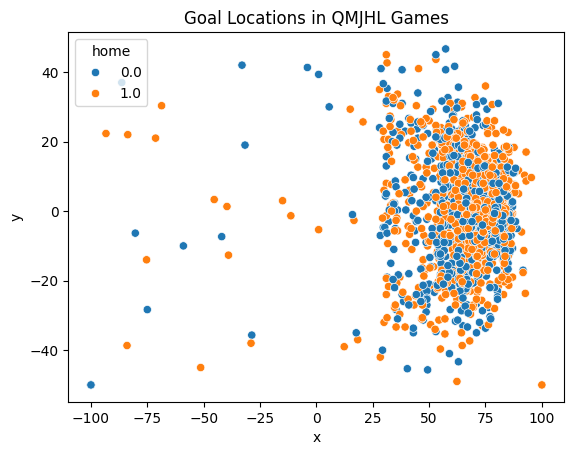

In [ ]:
goals = clean_df[clean_df["event"]=="goal"]

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=goals, x="x", y="y", hue="home")
plt.title("Goal Locations in QMJHL Games")